# Intensité des sécheresses passées

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

   id_zone code_zone type_zone                nom_zone  n_version  est_max_v  \
0     3235  52_49_14       SUP                COUASNON          1          0   
1     3236   54_79_6       SUP                Charente          1          0   
2     3237   94_2A_1       SUP                Zone sud          1          1   
3     3238   94_2A_2       SUP               Zone nord          1          1   
4     3239   94_2B_1       SUP  Departement Corse nord          1          0   

  code_dep         nom_dep                    nom_bv  \
0       49  Maine-et-Loire            Loire-Bretagne   
1       79     Deux-Sèvres             Adour-Garonne   
2       2A    Corse-du-Sud  Rhone-Mediterranee-Corse   
3       2A    Corse-du-Sud  Rhone-Mediterranee-Corse   
4       2B     Haute-Corse  Rhone-Mediterranee-Corse   

                                            geometry  
0  POLYGON ((-0.09315 47.48083, -0.09325 47.46446...  
1  POLYGON ((0.01832 46.15463, 0.02665 46.15214, ...  
2  MULTIPOLYGON (

<Axes: >

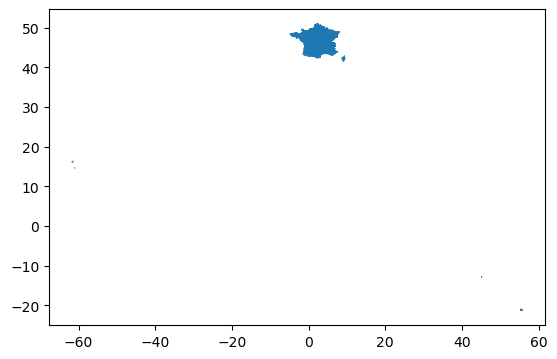

In [3]:
# Load the shapefile
filepath = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
gdf = gpd.read_file(filepath)

# Display the first few rows
print(gdf.head())

# Plot the shapefile (optional)
gdf.plot()

       id  idSandre                                              nom  \
0  323836      2117                                    Canal du Midi   
1  323837      2113                     Nappe des sables de l'Astien   
2  323838      2112                       Bassin versant de la Cesse   
3  323839      2106    Bassin versant de l’Aude aval – Berre et Rieu   
4  323840      2107  Bassin versant de l’Argent double et de l’Ognon   

         code type niveauGravite                         departement  \
0  76_34_0018  SUP     vigilance  { "code": "34", "nom": "Hérault" }   
1  76_34_0014  SOU        alerte  { "code": "34", "nom": "Hérault" }   
2  76_34_0016  SUP     vigilance  { "code": "34", "nom": "Hérault" }   
3  76_34_0013  SUP        alerte  { "code": "34", "nom": "Hérault" }   
4  76_34_0015  SUP        alerte  { "code": "34", "nom": "Hérault" }   

                                   arreteRestriction  \
0  { "id": 35080, "numero": "DDTM34-2024-12-15457...   
1  { "id": 35080, "num

<Axes: >

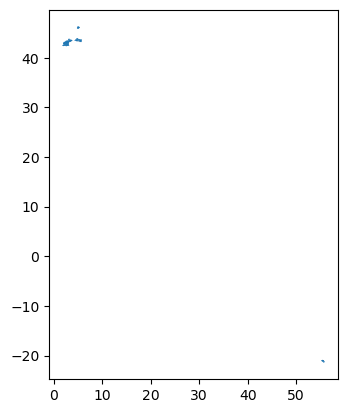

In [4]:
# Load the GeoJSON file
filepath2 = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"
gdf = gpd.read_file(filepath2)

# Display the first few rows
print(gdf.head())

# Plot the GeoJSON data (optional)
gdf.plot()

In [5]:
# to do : superposer les deux cartes avec légende de couleurs 

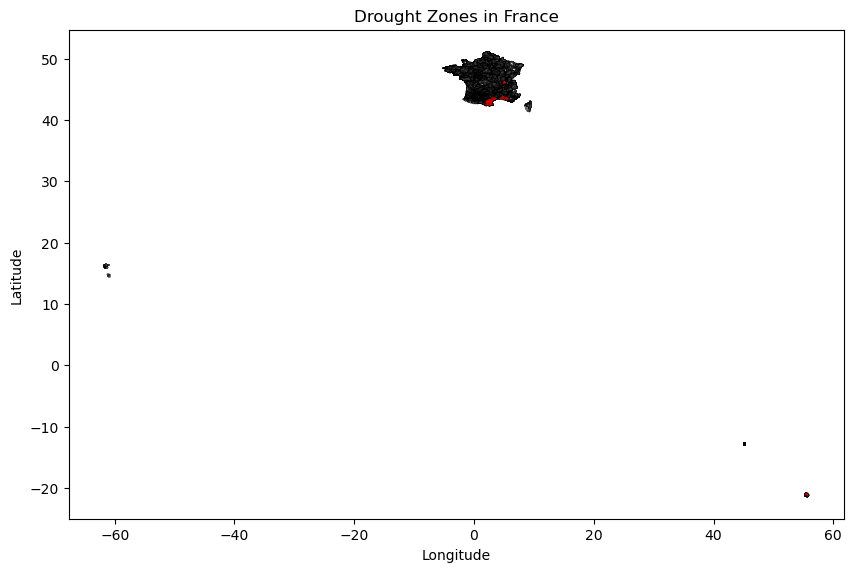

In [2]:
# File paths
shp_path = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
geojson_path = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"

# Load the shapefile (France map)
france_map = gpd.read_file(shp_path)

# Load the geojson file (Drought zones)
drought_zones = gpd.read_file(geojson_path)

# Ensure they have the same CRS (Coordinate Reference System)
if france_map.crs != drought_zones.crs:
    drought_zones = drought_zones.to_crs(france_map.crs)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the France map
france_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# Overlay the drought zones
drought_zones.plot(ax=ax, color='red', alpha=0.5)

# Add title and labels
ax.set_title("Drought Zones in France")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


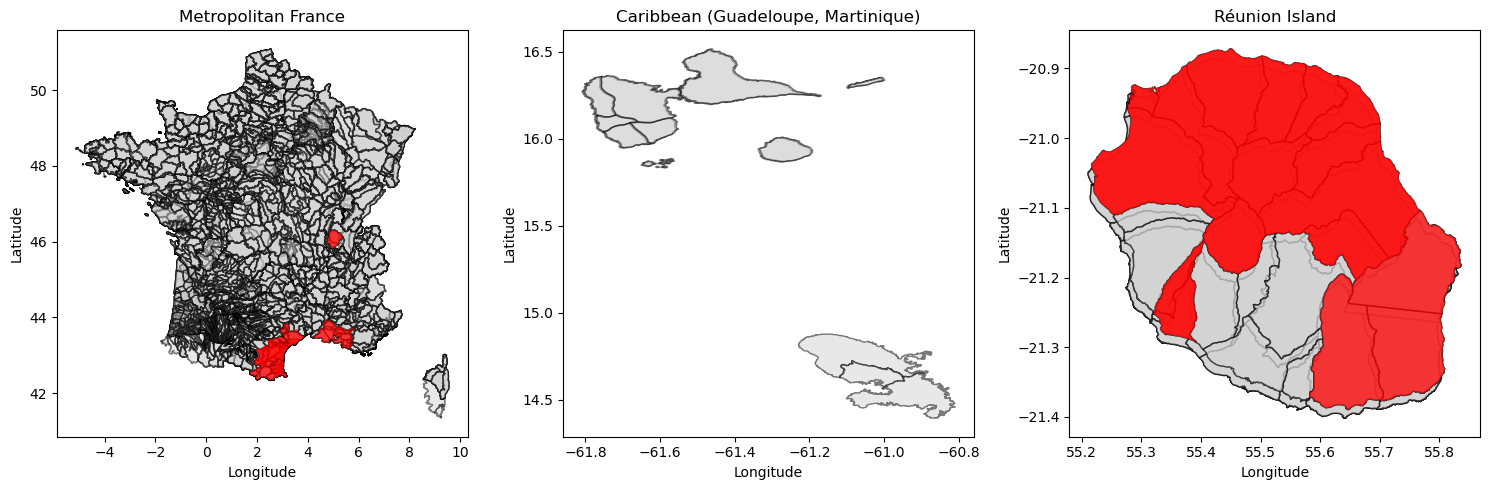

In [6]:
# File paths
shp_path = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
geojson_path = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"

# Load the datasets
france_map = gpd.read_file(shp_path)
drought_zones = gpd.read_file(geojson_path)

# Ensure they have the same CRS
if france_map.crs != drought_zones.crs:
    drought_zones = drought_zones.to_crs(france_map.crs)

# Define bounding boxes for the three regions
bbox_metropolitan = (-5.0, 41.0, 10.0, 52.0)  # Roughly Metropolitan France
bbox_caribbean = (-65.0, 10.0, -50.0, 20.0)   # Guadeloupe & Martinique
bbox_reunion = (54.0, -22.0, 56.0, -20.0)     # Réunion Island

# Function to filter based on bounding box
def filter_by_bbox(gdf, bbox):
    minx, miny, maxx, maxy = bbox
    return gdf.cx[minx:maxx, miny:maxy]

# Filter datasets
metropolitan_france = filter_by_bbox(france_map, bbox_metropolitan)
caribbean_france = filter_by_bbox(france_map, bbox_caribbean)
reunion_france = filter_by_bbox(france_map, bbox_reunion)

metropolitan_drought = filter_by_bbox(drought_zones, bbox_metropolitan)
caribbean_drought = filter_by_bbox(drought_zones, bbox_caribbean)
reunion_drought = filter_by_bbox(drought_zones, bbox_reunion)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

regions = [
    ("Metropolitan France", metropolitan_france, metropolitan_drought, axes[0]),
    ("Caribbean (Guadeloupe, Martinique)", caribbean_france, caribbean_drought, axes[1]),
    ("Réunion Island", reunion_france, reunion_drought, axes[2])
]

for title, base_map, drought_map, ax in regions:
    ax.set_title(title)

    if not base_map.empty:
        base_map.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.5)
    
    if not drought_map.empty:
        drought_map.plot(ax=ax, color="red", alpha=0.5)

    # Avoid aspect ratio issues
    ax.set_aspect("auto")  

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()